In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sbn 

import os


# Perf. vs Time (all experiments)

x-axis: -log2(time compared to DVGS) 
y-axis: perf compared to DVGS 

DVGS values will always lie at (1,1), all other experiment and methods will fall around this. Better performing/faster will have higher values. 



For performance, we'll use the area between filtered low and filtered high. 

In [28]:
def _parse_str_list(x): 
    return np.array([float(y) for y in x.strip('[]').split(',')])

In [62]:
dir_path = '../results/'

exp_res = {d:pd.read_csv(f'{dir_path}/{d}/results.csv', sep='\t') for d in os.listdir(dir_path)}

df = {'method':[], 'exp':[], 'time_relative_to_dvgs':[], 'perf_relative_to_dvgs':[]}
for _,res in exp_res.items(): 
    #print(res.head()); 3/0
    res = res[lambda x: x.method != 'apc']

    res = res.assign(perf_filter_low = lambda x: x.perf_filter_low.apply(_parse_str_list))
    res = res.assign(perf_filter_high = lambda x: x.perf_filter_high.apply(_parse_str_list))

    # step 1: get dvgs avg perf 
    dvgs_perf = (np.array(res[lambda x: x.method == 'dvgs'].perf_filter_low.values).mean(axis=0) - np.array(res[lambda x: x.method == 'dvgs'].perf_filter_high.values).mean(axis=0)).sum()

    # step 2: get dvgs avg time 
    dvgs_time = res[lambda x: x.method == 'dvgs'].runtime_s.mean()

    for i, row in res.iterrows(): 
        temp = row 
        method = row.method 
        exp = row.config.split('/')[-1][:-3]

        # get perf 
        perf = (temp.perf_filter_low - temp.perf_filter_high).sum()
        rel_perf = perf / dvgs_perf

        # get time 
        time = temp.runtime_s
        rel_time = -np.log2(time/dvgs_time)

        df['exp'].append(exp)
        df['method'].append(method)
        df['time_relative_to_dvgs'].append(rel_time)
        df['perf_relative_to_dvgs'].append(rel_perf)

df = pd.DataFrame(df)
df.head()

/tmp/ipykernel_4406/960646805.py:14: RuntimeWarning: Mean of empty slice.
  dvgs_perf = (np.array(res[lambda x: x.method == 'dvgs'].perf_filter_low.values).mean(axis=0) - np.array(res[lambda x: x.method == 'dvgs'].perf_filter_high.values).mean(axis=0)).sum()
/home/teddy/miniconda3/envs/dvgs/lib/python3.9/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


,method,exp,time_relative_to_dvgs,perf_relative_to_dvgs
0,dvrl,exp7,-1.825193,-0.636677
1,dvgs,exp7,-0.000000,1.000000
2,dvgs,exp2,-0.000000,1.000000
3,dvrl,exp2,-2.927143,0.735819
4,dvgs,exp6,-0.000000,1.000000


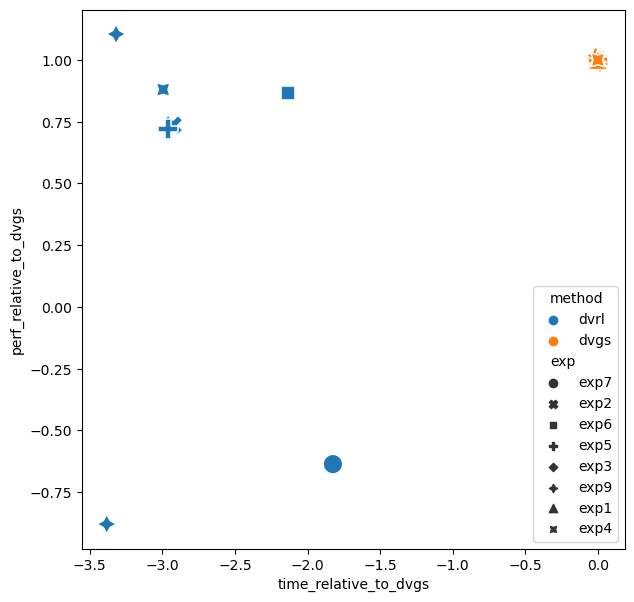

In [65]:
plt.figure(figsize=(7,7))
sbn.scatterplot(x='time_relative_to_dvgs', y='perf_relative_to_dvgs', hue='method', style='exp', data=df, s=200)
plt.show()